This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf # importing the tensorflow library
x = tf.ones(shape=(2, 1)) # creating a tensor of shape (2, 1) with all elements as 1
print(x) # printing the tensor x 
# the output will be a tensor of shape (2, 1) with all elements as 1

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1)) # creating a tensor of shape (2, 1) with all elements as 0
print(x) # printing the tensor x
# the output will be a tensor of shape (2, 1) with all elements as 0

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) # creating a tensor of shape (3, 1) with random elements
print(x) # printing the tensor x
# the output will be a tensor of shape (3, 1) with random elements

tf.Tensor(
[[-0.4322553 ]
 [-0.00952613]
 [-0.97878283]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) # creating a tensor of shape (3, 1) with random elements between 0 and 1
print(x) # printing the tensor x
# the output will be a tensor of shape (3, 1) with random elements between 0 and 1

tf.Tensor(
[[0.09513783]
 [0.78462696]
 [0.94043756]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [6]:
import numpy as np # importing the numpy library
x = np.ones(shape=(2, 2)) # creating a numpy array of shape (2, 2) with all elements as 1
x[0, 0] = 0. # changing the element at 0th row and 0th column to 0 because the indexing starts from 0

**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1))) # creating a variable tensor of shape (3, 1) with random elements
print(v) # printing the variable tensor v
# the output will be a tensor of shape (3, 1) with random elements

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.26066244],
       [ 1.0019495 ],
       [-1.5634423 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [8]:
v.assign(tf.ones((3, 1))) # assigning a tensor of shape (3, 1) with all elements as 1 to the variable tensor v
# the output will be a tensor of shape (3, 1) with all elements as 1

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [9]:
v[0, 0].assign(3.) # assigning 3 to the element at 0th row and 0th column of the variable tensor v
# the output will be a tensor of shape (3, 1) with 3 at the element at 0th row and 0th column

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [10]:
v.assign_add(tf.ones((3, 1))) # adding a tensor of shape (3, 1) with all elements as 1 to the variable tensor v
# the output will be a tensor of shape (3, 1) with all elements incremented by 1

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [11]:
a = tf.ones((2, 2)) # creating a tensor of shape (2, 2) with all elements as 1
b = tf.square(a) # squaring the tensor a
c = tf.sqrt(a) # taking the square root of the tensor a
d = b + c # adding the tensors b and c 
e = tf.matmul(a, b) # multiplying the tensors a and b
e *= d # multiplying the tensor e with d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [12]:
input_var = tf.Variable(initial_value=3.) # creating a variable tensor with initial value 3
with tf.GradientTape() as tape: # creating a gradient tape to record the operations for automatic differentiation 
   result = tf.square(input_var) # squaring the input tensor and storing the result in the variable result 
gradient = tape.gradient(result, input_var) # calculating the gradient of the result with respect to the input tensor 

**Using `GradientTape` with constant tensor inputs**

In [13]:
input_const = tf.constant(3.) # creating a constant tensor with value 3
with tf.GradientTape() as tape: # creating a gradient tape to record the operations for automatic differentiation
   tape.watch(input_const) # watching the input tensor to record the operations for automatic differentiation 
   result = tf.square(input_const) # squaring the input tensor and storing the result in the variable result
gradient = tape.gradient(result, input_const) # calculating the gradient of the result with respect to the input tensor

**Using nested gradient tapes to compute second-order gradients**

In [14]:
time = tf.Variable(0.) # creating a variable tensor with initial value 0
with tf.GradientTape() as outer_tape: # creating an outer gradient tape to record the operations for automatic differentiation
    with tf.GradientTape() as inner_tape: # creating an inner gradient tape to record the operations for automatic differentiation
        position =  4.9 * time ** 2 # calculating the position of an object using the formula 4.9 * time ** 2
    speed = inner_tape.gradient(position, time) # calculating the speed of the object using the gradient of the position with respect to time
acceleration = outer_tape.gradient(speed, time) # calculating the acceleration of the object using the gradient of the speed with respect to time

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [15]:
num_samples_per_class = 1000 # defining the number of samples per class
negative_samples = np.random.multivariate_normal( # generating negative samples using the multivariate_normal function
    mean=[0, 3], # defining the mean of the negative samples 
    cov=[[1, 0.5],[0.5, 1]], # defining the covariance matrix of the negative samples 
    size=num_samples_per_class) # defining the size of the negative samples
positive_samples = np.random.multivariate_normal( # generating positive samples using the multivariate_normal function
    mean=[3, 0], # defining the mean of the positive samples
    cov=[[1, 0.5],[0.5, 1]], # defining the covariance matrix of the positive samples
    size=num_samples_per_class) # defining the size of the positive samples

**Stacking the two classes into an array with shape (2000, 2)**

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) # stacking the negative and positive samples and converting the data type to float32

**Generating the corresponding targets (0 and 1)**

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), # stacking the targets and converting the data type to float32
                     np.ones((num_samples_per_class, 1), dtype="float32"))) # stacking the targets and converting the data type to float32

**Plotting the two point classes**

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

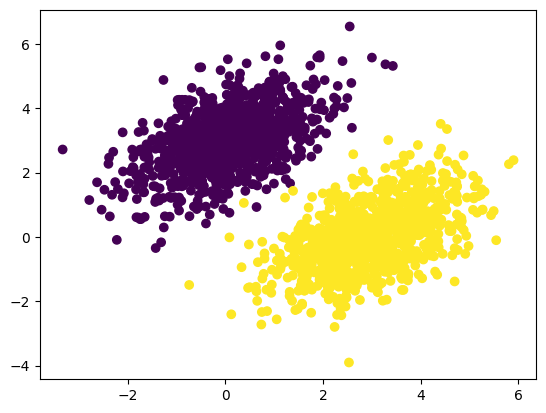

In [18]:
import matplotlib.pyplot as plt # importing the matplotlib library
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) # creating a scatter plot of the inputs and targets 
plt.show() # displaying the plot
# the output will be a scatter plot of the inputs and targets with different colors for different classes 

**Creating the linear classifier variables**

In [19]:
input_dim = 2 # defining the input dimension as 2 because the input samples have 2 features
output_dim = 1 # defining the output dimension as 1 because the output is binary
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # creating a variable tensor of shape (input_dim, output_dim) with random elements
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # creating a variable tensor of shape (output_dim,) with all elements as 0 because the bias is initialized to 0

**The forward pass function**

In [20]:
def model(inputs): # defining a function to calculate the output of the model 
    return tf.matmul(inputs, W) + b # returning the output of the model using the equation y = Wx + b 

**The mean squared error loss function**

In [21]:
def square_loss(targets, predictions): # defining a function to calculate the square loss
    per_sample_losses = tf.square(targets - predictions) # calculating the square loss for each sample 
    return tf.reduce_mean(per_sample_losses) # returning the mean of the square losses

**The training step function**

In [22]:
learning_rate = 0.1 # defining the learning rate 

def training_step(inputs, targets): # defining a function to perform a training step
    with tf.GradientTape() as tape: # creating a gradient tape to record the operations for automatic differentiation
        predictions = model(inputs) # calculating the predictions using the model 
        loss = square_loss(targets, predictions) # calculating the loss using the square loss function
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # calculating the gradients of the loss with respect to W and b
    W.assign_sub(grad_loss_wrt_W * learning_rate) # updating the variable tensor W using the gradients and the learning rate
    b.assign_sub(grad_loss_wrt_b * learning_rate) # updating the variable tensor b using the gradients and the learning rate
    return loss # returning the loss

**The batch training loop**

In [23]:
for step in range(40): # iterating over each step
    loss = training_step(inputs, targets) # performing a training step and storing the loss
    print(f"Loss at step {step}: {loss:.4f}") # printing the loss at each step
# the output will be the loss at each step, which should decrease over time if the model is learning correctly 

Loss at step 0: 5.4672
Loss at step 1: 0.5378
Loss at step 2: 0.1801
Loss at step 3: 0.1286
Loss at step 4: 0.1152
Loss at step 5: 0.1070
Loss at step 6: 0.1000
Loss at step 7: 0.0936
Loss at step 8: 0.0878
Loss at step 9: 0.0825
Loss at step 10: 0.0776
Loss at step 11: 0.0731
Loss at step 12: 0.0690
Loss at step 13: 0.0653
Loss at step 14: 0.0619
Loss at step 15: 0.0587
Loss at step 16: 0.0558
Loss at step 17: 0.0532
Loss at step 18: 0.0508
Loss at step 19: 0.0486
Loss at step 20: 0.0465
Loss at step 21: 0.0447
Loss at step 22: 0.0430
Loss at step 23: 0.0414
Loss at step 24: 0.0400
Loss at step 25: 0.0387
Loss at step 26: 0.0375
Loss at step 27: 0.0364
Loss at step 28: 0.0353
Loss at step 29: 0.0344
Loss at step 30: 0.0336
Loss at step 31: 0.0328
Loss at step 32: 0.0321
Loss at step 33: 0.0314
Loss at step 34: 0.0308
Loss at step 35: 0.0303
Loss at step 36: 0.0298
Loss at step 37: 0.0293
Loss at step 38: 0.0289
Loss at step 39: 0.0285


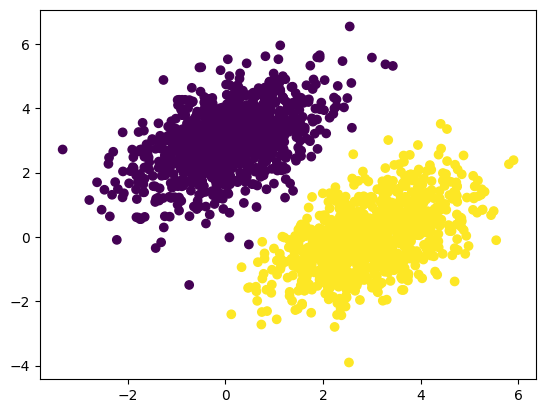

In [24]:
predictions = model(inputs) # calculating the predictions using the model
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # creating a scatter plot of the inputs and predictions
plt.show() # displaying the plot
# the output will be a scatter plot of the inputs and predictions with different colors for different classes based on the threshold of 0.5

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

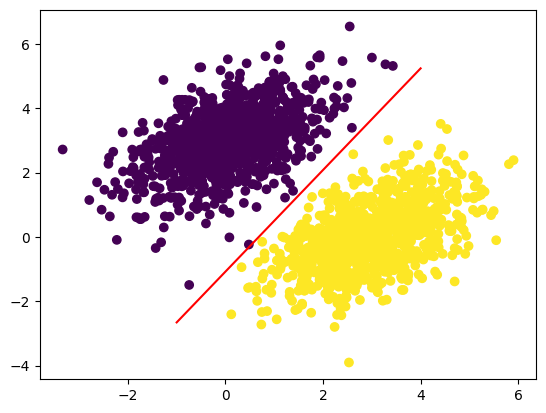

In [25]:
x = np.linspace(-1, 4, 100) # creating a numpy array of 100 elements between -1 and 4
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] # calculating the decision boundary using the equation Wx + b = 0
plt.plot(x, y, "-r") # plotting the decision boundary 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # creating a scatter plot of the inputs and predictions
# the output will be a scatter plot of the inputs and predictions with the decision boundary separating the classes

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [26]:
from tensorflow import keras # importing the keras module from the tensorflow library

class SimpleDense(keras.layers.Layer): # defining a custom dense layer using the keras module

    def __init__(self, units, activation=None): # defining the constructor of the custom dense layer
        super().__init__() # calling the constructor of the parent class
        self.units = units # setting the number of units in the dense layer
        self.activation = activation # setting the activation function of the dense layer

    def build(self, input_shape): # defining the build method of the custom dense layer 
        input_dim = input_shape[-1] # getting the input dimension of the dense layer 
        self.W = self.add_weight(shape=(input_dim, self.units), # adding a weight tensor to the dense layer with shape (input_dim, units) 
                                 initializer="random_normal") # initializing the weight tensor using the random_normal initializer 
        self.b = self.add_weight(shape=(self.units,), # adding a weight tensor to the dense layer with shape (units,)
                                 initializer="zeros") # initializing the weight tensor using the zeros initializer

    def call(self, inputs): # defining the call method of the custom dense layer
        y = tf.matmul(inputs, self.W) + self.b # calculating the output of the dense layer using the equation y = Wx + b
        if self.activation is not None: # checking if the activation function is defined 
            y = self.activation(y) # applying the activation function to the output of the dense layer
        return y # returning the output of the dense layer

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu) # creating an instance of the custom dense layer with 32 units and ReLU activation function
input_tensor = tf.ones(shape=(2, 784)) # creating a tensor of shape (2, 784) with all elements as 1
output_tensor = my_dense(input_tensor) # calculating the output of the custom dense layer using the input tensor
print(output_tensor.shape) # printing the shape of the output tensor
# the output will be the shape of the output tensor, which should be (2, 32) because the dense layer has 32 units 

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [28]:
from tensorflow.keras import layers # importing the layers module from the keras module of the tensorflow library 
layer = layers.Dense(32, activation="relu") # creating a dense layer with 32 units and ReLU activation function

In [29]:
from tensorflow.keras import models # importing the models module from the keras module of the tensorflow library
from tensorflow.keras import layers # importing the layers module from the keras module of the tensorflow library
model = models.Sequential([ # creating a sequential model using the keras module, which is a linear stack of layers
    layers.Dense(32, activation="relu"), # adding a dense layer with 32 units and ReLU activation function to the model, which is the input layer
    layers.Dense(32) # adding a dense layer with 32 units to the model, which is the output layer
])

In [30]:
model = keras.Sequential([ # creating a sequential model using the keras module
    SimpleDense(32, activation="relu"), # adding a custom dense layer with 32 units and ReLU activation function to the model
    SimpleDense(64, activation="relu"), # adding a custom dense layer with 64 units and ReLU activation function to the model
    SimpleDense(32, activation="relu"), # adding a custom dense layer with 32 units and ReLU activation function to the model
    SimpleDense(10, activation="softmax") # adding a custom dense layer with 10 units and softmax activation function to the model
])

### From layers to models

### The "compile" step: Configuring the learning process

In [31]:
model = keras.Sequential([keras.layers.Dense(1)]) # creating a sequential model with a dense layer with 1 unit, which is equivalent to a linear regression model
model.compile(optimizer="rmsprop", # compiling the model using the rmsprop optimizer, which is a variant of stochastic gradient descent
              loss="mean_squared_error", # using the mean squared error loss function, which is suitable for regression problems
              metrics=["accuracy"]) # using the accuracy metric, which is not applicable for regression problems

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(), # compiling the model using the RMSprop optimizer, which is a variant of stochastic gradient descent
              loss=keras.losses.MeanSquaredError(), # using the mean squared error loss function, which is suitable for regression problems
              metrics=[keras.metrics.BinaryAccuracy()]) # using the binary accuracy metric, which is suitable for binary classification problems

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [33]:
history = model.fit( # training the model using the fit method
    inputs, # passing the inputs to the model
    targets, # passing the targets to the model
    epochs=5, # specifying the number of epochs
    batch_size=128 # specifying the batch size
)
# the output will be the training process of the model, including the loss and metrics at each epoch
# the model will be trained for 5 epochs with a batch size of 128 samples per batch
# the binary accuracy metric rises as the model learns to classify the samples correctly

Epoch 1/5
16/16 [==============================] - 0s 579us/step - loss: 4.0553 - binary_accuracy: 0.6755
Epoch 2/5
16/16 [==============================] - 0s 393us/step - loss: 3.7685 - binary_accuracy: 0.6820
Epoch 3/5
16/16 [==============================] - 0s 372us/step - loss: 3.5324 - binary_accuracy: 0.6935
Epoch 4/5
16/16 [==============================] - 0s 376us/step - loss: 3.3089 - binary_accuracy: 0.7060
Epoch 5/5
16/16 [==============================] - 0s 376us/step - loss: 3.0964 - binary_accuracy: 0.7145


In [34]:
history.history # printing the history of the training process
# the output will be a dictionary containing the loss and metrics at each epoch
# it shows how the loss and metrics changed during the training process, where the loss should decrease and the metrics should increase

{'loss': [4.0553412437438965,
  3.768523693084717,
  3.532421350479126,
  3.3088901042938232,
  3.0964412689208984],
 'binary_accuracy': [0.6754999756813049,
  0.6819999814033508,
  0.6934999823570251,
  0.7059999704360962,
  0.7145000100135803]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)]) # creating a sequential model with a dense layer with 1 unit
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1), # compiling the model using the RMSprop optimizer with a learning rate of 0.1
              loss=keras.losses.MeanSquaredError(), # using the mean squared error loss function
              metrics=[keras.metrics.BinaryAccuracy()]) # using the binary accuracy metric

indices_permutation = np.random.permutation(len(inputs)) # generating a random permutation of the indices of the inputs
shuffled_inputs = inputs[indices_permutation] # shuffling the inputs using the random permutation
shuffled_targets = targets[indices_permutation] # shuffling the targets using the random permutation

num_validation_samples = int(0.3 * len(inputs)) # calculating the number of validation samples
val_inputs = shuffled_inputs[:num_validation_samples] # selecting the validation inputs
val_targets = shuffled_targets[:num_validation_samples] # selecting the validation targets
training_inputs = shuffled_inputs[num_validation_samples:] # selecting the training inputs
training_targets = shuffled_targets[num_validation_samples:] # selecting the training targets
model.fit( # training the model using the fit method
    training_inputs, # passing the training inputs to the model
    training_targets, # passing the training targets to the model
    epochs=5, # specifying the number of epochs
    batch_size=16, # specifying the batch size
    validation_data=(val_inputs, val_targets) # passing the validation data to the model
)
# the output will be the training process of the model, including the loss and metrics at each epoch
# the model will be trained for 5 epochs with a batch size of 16 samples per batch
# the binary accuracy metric rises as the model learns to classify the samples correctly
# the loss metric decreases as the model learns to minimize the error, espevcially at the first epoch
# the validation loss and metrics are also displayed, which help to monitor the model's performance on unseen data
# the validation loss and metrics should be close to the training loss and metrics if the model generalizes well to unseen data
# the validation loss should not increase while the training loss decrease, which indicates overfitting
# the val_binary_accuracy metric should be close to the binary_accuracy metric, which isnt the case in this example for the second epoch

Epoch 1/5
88/88 [==============================] - 0s 1ms/step - loss: 0.4922 - binary_accuracy: 0.9343 - val_loss: 0.0445 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 499us/step - loss: 0.0760 - binary_accuracy: 0.9507 - val_loss: 0.2235 - val_binary_accuracy: 0.8100
Epoch 3/5
88/88 [==============================] - 0s 480us/step - loss: 0.0715 - binary_accuracy: 0.9586 - val_loss: 0.0913 - val_binary_accuracy: 0.9850
Epoch 4/5
88/88 [==============================] - 0s 478us/step - loss: 0.0729 - binary_accuracy: 0.9564 - val_loss: 0.0745 - val_binary_accuracy: 0.9667
Epoch 5/5
88/88 [==============================] - 0s 474us/step - loss: 0.0712 - binary_accuracy: 0.9621 - val_loss: 0.0348 - val_binary_accuracy: 0.9983


### Inference: Using a model after training

In [36]:
predictions = model.predict(val_inputs, batch_size=128) # making predictions using the model
print(predictions[:10]) # printing the first 10 predictions
# the output will be the first 10 predictions made by the model
# the predictions are the model's output for the validation inputs
# the predictions can be used to evaluate the model's performance on unseen data
# it shows the model's confidence in the predictions, where higher values indicate higher confidence

5/5 [==============================] - 0s 531us/step
[[-0.18503743]
 [ 0.42764378]
 [ 1.0610917 ]
 [ 1.2155566 ]
 [ 0.3566878 ]
 [-0.15827078]
 [ 0.21574122]
 [ 1.1098812 ]
 [ 0.850632  ]
 [ 0.27244005]]


## Summary